In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/bank+marketing/bank/bank-full.csv'
df = pd.read_csv(file_path, sep=';')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (45211, 17)

First few rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib


base_path = '/content/drive/MyDrive/bank+marketing/bank/'


import os
print("Available files:")
for file in os.listdir(base_path):
    if file.endswith('.csv'):
        print(f"- {file}")

Available files:
- bank-full.csv
- bank.csv


In [6]:

file_path = base_path + 'bank-full.csv'

try:
    df = pd.read_csv(file_path, sep=';')
    print("Successfully loaded bank-full.csv")
    print(f"Dataset shape: {df.shape}")
except:
    file_path = base_path + 'bank.csv'
    df = pd.read_csv(file_path, sep=';')
    print("Loaded bank.csv (smaller version)")
    print(f"Dataset shape: {df.shape}")

print("\nFirst 5 rows:")
df.head()

Successfully loaded bank-full.csv
Dataset shape: (45211, 17)

First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

print("\nTarget variable distribution:")
target_dist = df['y'].value_counts()
print(target_dist)
print(f"\nPercentage of 'yes': {target_dist['yes']/len(df)*100:.2f}%")

print("\nNumerical features summary:")
print(df.describe())

categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_cols)}")

try:
    with open(base_path + 'bank-names.txt', 'r') as f:
        print("\nDataset description snippet:")
        print(f.read()[:500] + "...")
except:
    print("\nNo bank-names.txt file found")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Missing values:
age          0
job          0
marital      0
education    0
def

In [8]:
def enhanced_preprocess_data(df):
    """Enhanced preprocessing with better handling of categorical variables"""
    df_processed = df.copy()

    df_processed['y'] = df_processed['y'].map({'no': 0, 'yes': 1})

    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_cols = [col for col in categorical_cols if col != 'y']

    ordinal_mappings = {
        'education': {'unknown': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3,
                     'high.school': 4, 'professional.course': 5, 'university.degree': 6, 'illiterate': 0},
        'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
    }

    for col, mapping in ordinal_mappings.items():
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].map(mapping)
            categorical_cols = [c for c in categorical_cols if c != col]

    df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

    return df_processed

df_processed = enhanced_preprocess_data(df)
print("Processed dataset shape:", df_processed.shape)
print("\nFirst few rows of processed data:")
df_processed.head()

Processed dataset shape: (45211, 31)

First few rows of processed data:


,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,NaN,2143,5,5,261,1,-1,0,0,...,True,False,False,True,False,False,True,False,False,True
1,44,NaN,29,5,5,151,1,-1,0,0,...,False,True,False,True,False,False,True,False,False,True
2,33,NaN,2,5,5,76,1,-1,0,0,...,True,False,False,True,True,False,True,False,False,True
3,47,0.0,1506,5,5,92,1,-1,0,0,...,True,False,False,True,False,False,True,False,False,True
4,33,0.0,1,5,5,198,1,-1,0,0,...,False,True,False,False,False,False,True,False,False,True


In [9]:

X = df_processed.drop('y', axis=1)
y = df_processed['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Positive class in training: {y_train.mean():.3f}")
print(f"Positive class in test: {y_test.mean():.3f}")

Training set: (31647, 30)
Test set: (13564, 30)
Positive class in training: 0.117
Positive class in test: 0.117


In [10]:
class_weights = {0: 1, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}
print(f"Class weights: {class_weights}")

dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=6,
    min_samples_split=50,
    min_samples_leaf=20,
    class_weight=class_weights
)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Class weights: {0: 1, 1: 7.548622366288493}
Accuracy: 0.8392804482453553
F1 Score: 0.538917089678511

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     11977
           1       0.41      0.80      0.54      1587

    accuracy                           0.84     13564
   macro avg       0.69      0.82      0.72     13564
weighted avg       0.90      0.84      0.86     13564



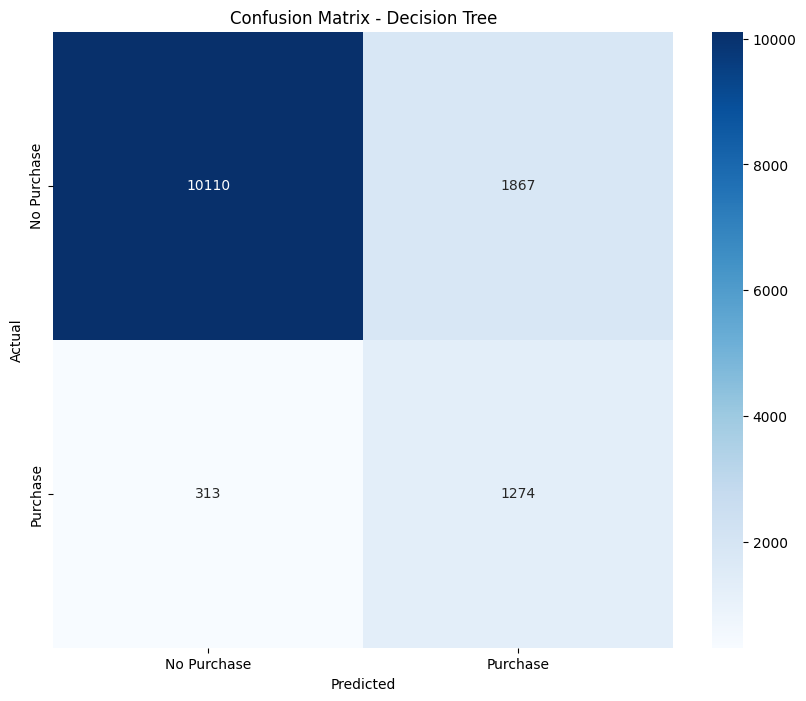

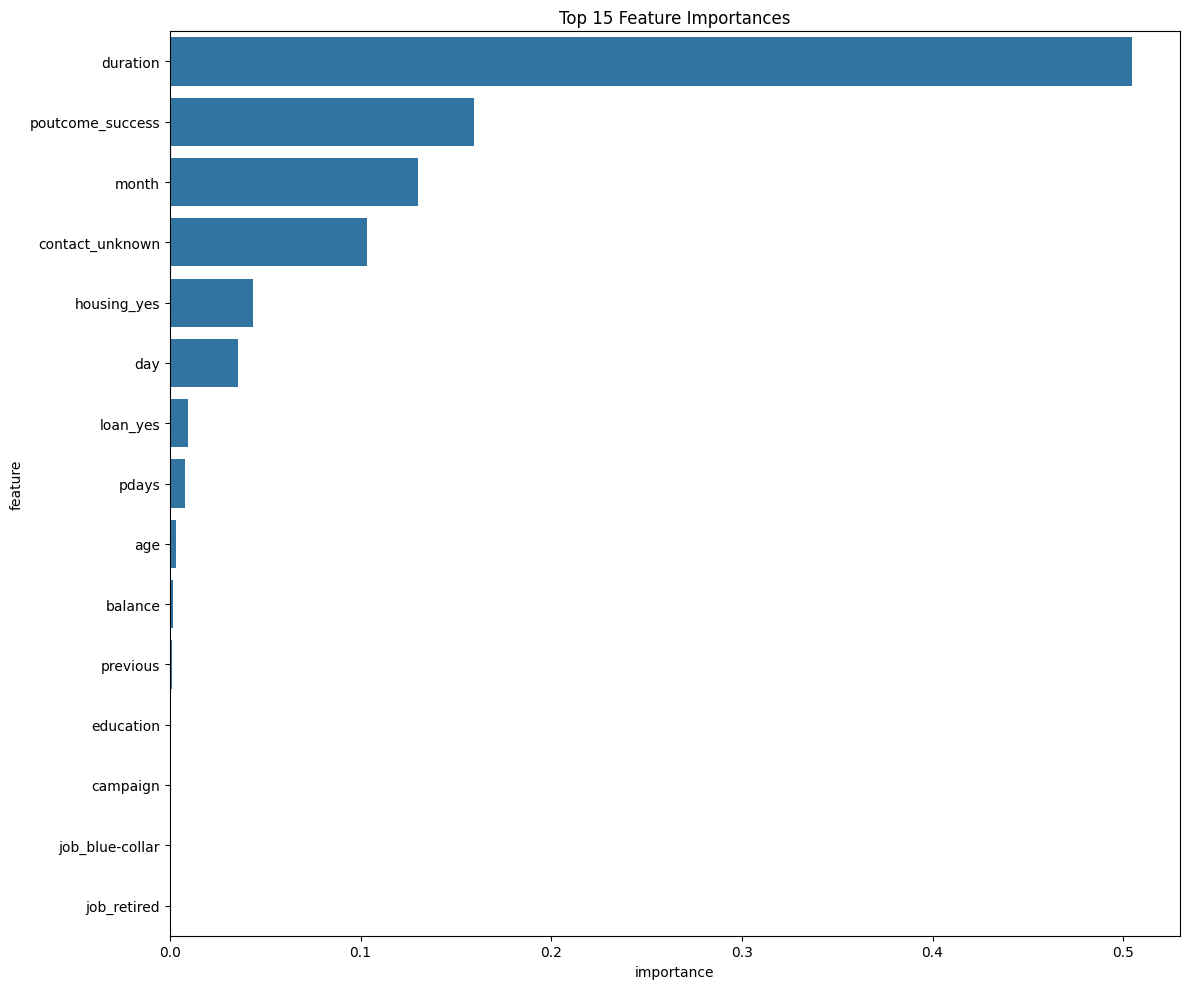

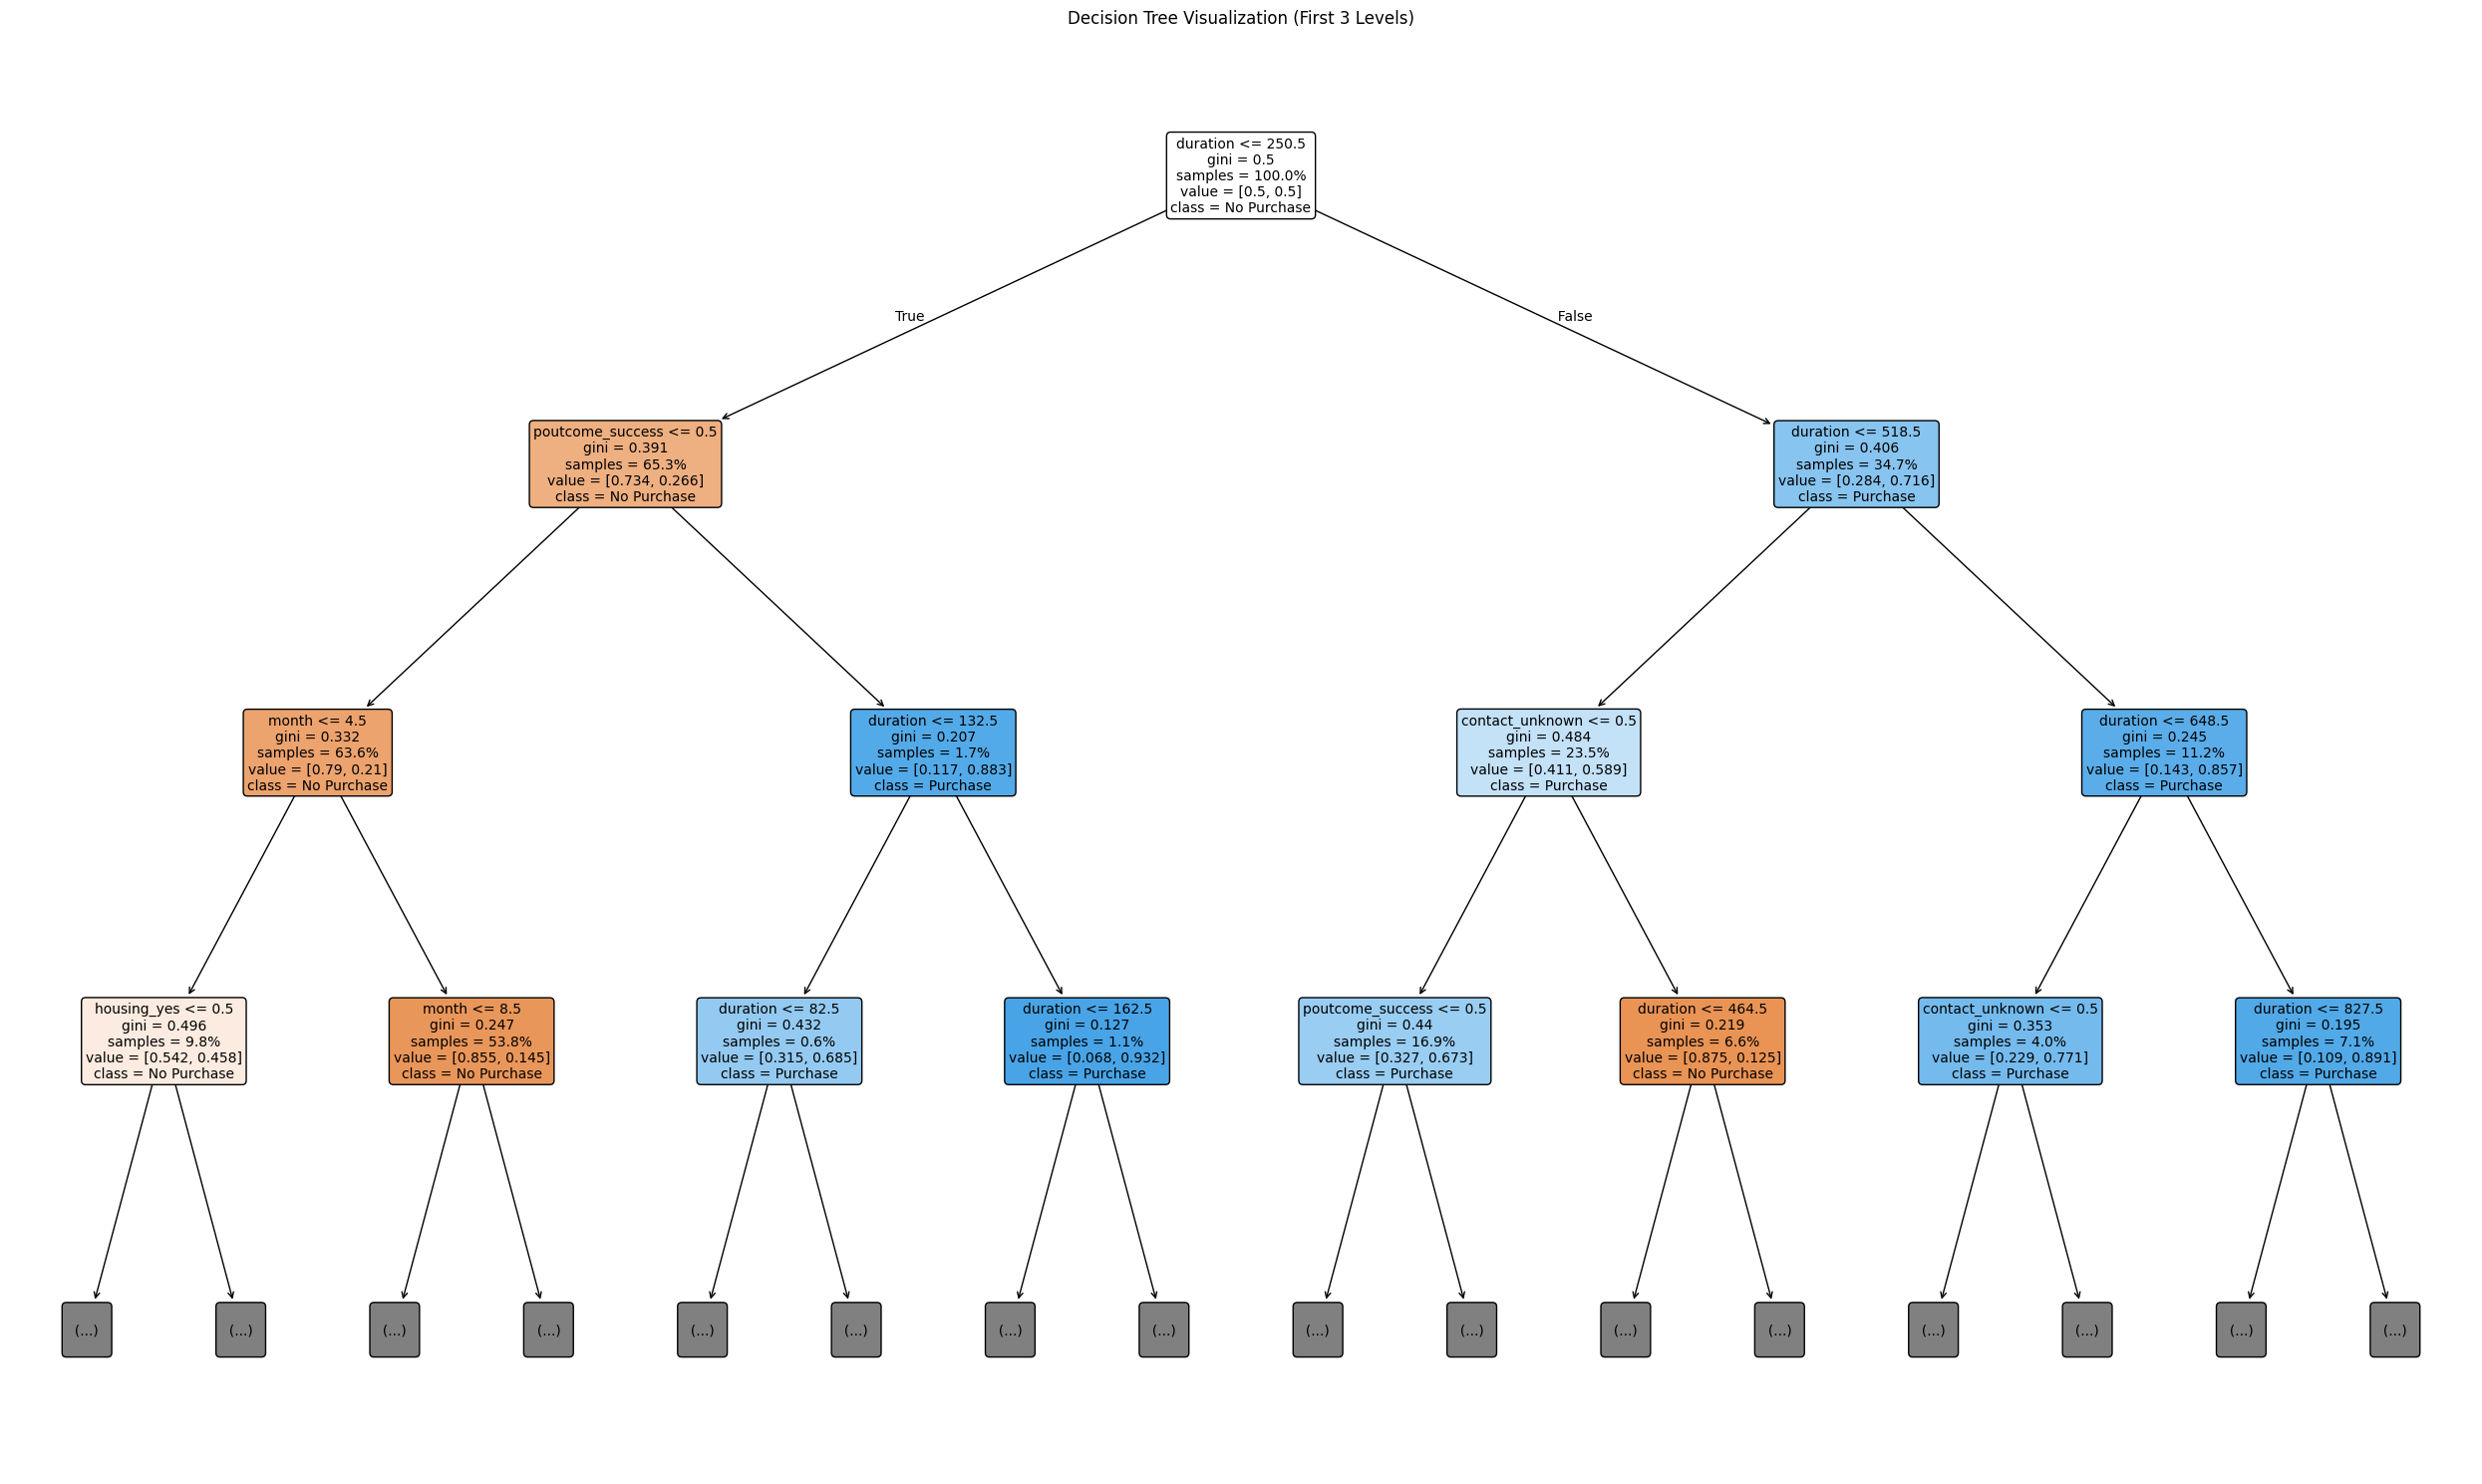

In [11]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature',
            data=feature_importance.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 15))
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=['No Purchase', 'Purchase'],
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=10,
          proportion=True)
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.tight_layout()
plt.show()

In [13]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', class_weights]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1 score:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_best))

Starting hyperparameter tuning...
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'class_weight': {0: 1, 1: 7.548622366288493}, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 50}
Best cross-validation F1 score: 0.5369656785925269

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     11977
           1       0.39      0.84      0.54      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.83      0.72     13564
weighted avg       0.91      0.83      0.85     13564



In [17]:
def compare_datasets():
    datasets = {
        'bank.csv': base_path + 'bank.csv',
        'bank-full.csv': base_path + 'bank-full.csv'
    }

    results = {}

    for name, path in datasets.items():
        try:
            temp_df = pd.read_csv(path, sep=';')
            temp_processed = enhanced_preprocess_data(temp_df)
            X_temp = temp_processed.drop('y', axis=1)
            y_temp = temp_processed['y']

            results[name] = {
                'shape': temp_df.shape,
                'positive_rate': y_temp.mean(),
                'features': X_temp.shape[1]
            }
            print(f"{name}: {temp_df.shape}, Positive rate: {y_temp.mean():.3f}")
        except:
            print(f"Could not load {name}")

    return results



In [18]:
model_path = '/content/drive/MyDrive/bank_marketing_decision_tree.pkl'
joblib.dump(best_dt, model_path)

feature_importance_path = '/content/drive/MyDrive/feature_importance.csv'
feature_importance.to_csv(feature_importance_path, index=False)

results = {
    'accuracy': accuracy_score(y_test, y_pred_best),
    'f1_score': f1_score(y_test, y_pred_best),
    'best_params': grid_search.best_params_
}

import json
with open('/content/drive/MyDrive/model_results.json', 'w') as f:
    json.dump(results, f, indent=2)

print("Model, feature importance, and results saved successfully!")
print(f"Final Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Final Model F1 Score: {f1_score(y_test, y_pred_best):.4f}")

Model, feature importance, and results saved successfully!
Final Model Accuracy: 0.8292
Final Model F1 Score: 0.5354
